Разложение Холецкого - это способ представления симметричной положительно определенной матрицы $A$ в виде произведения двух треугольных матриц: $A = L * L^T$, где $L$ - нижняя треугольная матрица с положительными элементами на диагонали.

---
**Решение системы линейных уравнений**

Разложение Холецкого может быть использовано для решения систем линейных уравнений с симметричной положительно определенной матрицей $A$, поскольку система $Ax = b$ может быть переписана в виде $L L^T x = b$. Заменив $y = L^T x$, мы можем решить две системы линейных уравнений: $Ly = b$ и $L^T x = y$. Решать системы с нижней треугольной матрицей удобно методом обратной подстановки.

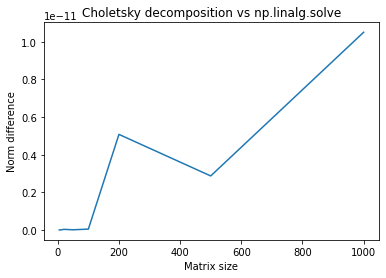

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def generate_positive_definite_matrix(n):
    A = np.random.rand(n, n)
    Q, _ = np.linalg.qr(A)
    D = np.diag(np.random.rand(n))
    return np.dot(Q, np.dot(D, Q.T))

def choletsky(A, tol=1e-8):
    n = len(A)
    L = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1):
            if j == i:
                temp = A[i][i] - np.sum(np.square(L[i][:i]))
                if temp < 0:
                    raise ValueError("Matrix A is not positive definite")
                L[i][j] = np.sqrt(temp)
            else:
                L[i][j] = (A[i][j] - np.sum(L[i][:j]*L[j][:j])) / L[j][j]

    # Проверяем правильность разложения с порогом tol
    if np.linalg.norm(np.dot(L, L.T) - A) > tol:
        print("Error: Choletsky decomposition is incorrect")
        return
    
    return L

def solve(A, b):
    L = choletsky(A)

    # Решим Ly = b
    n = len(b)
    y = np.zeros(n)
    if L[0][0] == 0:
        raise ValueError("L[0][0] is zero")
    y[0] = b[0] / L[0][0]
    for i in range(1, n):
        if L[i][i] == 0:
            raise ValueError(f"L[{i}][{i}] is zero")
        y[i] = (b[i] - np.dot(L[i][:i], y[:i])) / L[i][i]
        
    # Решим L^Tx = y 
    x = np.zeros(n)
    if L[n-1][n-1] == 0:
        raise ValueError("L[n-1][n-1] is zero")
    x[n-1] = y[n-1] / L[n-1][n-1]
    for i in range(n-2, -1, -1):
        if L[i][i] == 0:
            raise ValueError(f"L[{i}][{i}] is zero")
        x[i] = (y[i] - np.dot(L[i+1:][:,i], x[i+1:])) / L[i][i]
        
    return x

def main():
    np.random.seed(0)
    sizes = [5, 10, 20, 50, 100, 200, 500, 1000]
    norm_diffs = []
    
    for n in sizes:
        A = generate_positive_definite_matrix(n)
        b = np.random.rand(n)
        
        L = choletsky(A)
        x = solve(A, b)
        x_np = np.linalg.solve(A, b)
        
        norm_diff = np.linalg.norm(x - x_np)
        norm_diffs.append(norm_diff)
        
    plt.plot(sizes, norm_diffs)
    plt.xlabel("Matrix size")
    plt.ylabel("Norm difference")
    plt.title("Choletsky decomposition vs np.linalg.solve")
    plt.show()
        
main()



---
**Решение задачи наименьших квадратов**
